**PROCESAMIENTO DE INFORMACION EN APLICACIONES TELEMATICAS - GRUPO-B**\
**NOMBRE:ALDO QUISPE AVENDAÑO**\
**CUI:20153752**

**Lingk de google colab:**
https://colab.research.google.com/drive/1cOUlpfIyEflNFz7wq_cXePfl--3B-JyX?usp=sharing

# **PROBLEMA DE REGRESIÓN**

Para desarrollar el este trabajo, será necesario que cuente con acceso a un ordenador donde pueda ejecutar Jupyter Notebook. Jupyter Notebook puede ser ejecutado en forna online en (https://colab.research.google.com/) o en (https://deepnote.com/). Para trabajar en escritorio, deberá tener instalado un compilador de Python, por ejemplo Anaconda (https://www.anaconda.com/).

Este trabajo consta de 4 preguntas, propone resolver un problema de regresión con datos cada estudiante debe generar según lo indiciado en la pregunta P1.  

Sus resultados deberá presentarlo en un solo documento en formato PDF. Tenga en cuenta que si presenta en otro formato, este no será considerado en la revisión. 

#1.- PROBLEMA 1
A continuación se les muestra un segmento de código de Jupyter Notebook. Este código le permitirá generar una base de datos para un problema de regresión. Para ello, complete la variable 'id' colocando el número que es igual a la suma de los últimos 5 dígitos de su código de estudiantes, es decir, si su código es 151-12-32366, la variable 'id' será:

id=3+2+3+6+6=20
 


200
200



Text(0, 0.5, 'y')

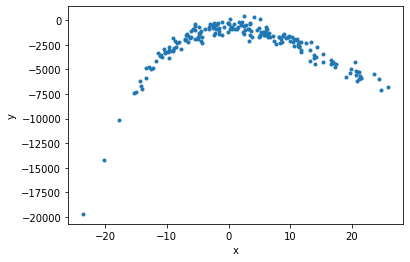

In [191]:
# Librearias que siempre usamos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings # suprimir advertencias 
warnings.filterwarnings('ignore') #"ignore" nunca imprime advertencias que coincidan
id =22  # sumar los últimos 5 digitos de su código de estudiante CUI:20153752=2+5+7+3+5=22
np.random.seed(0) #Siembra el generador.
x = 2+10 * np.random.normal(0, 1, 200) #Extraiga muestras aleatorias de una distribución normal (gaussiana).(loc=0.0, scale=1.0, size=None)
y = x - id * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-500, 500, 200) #Extraiga muestras aleatorias de una distribución normal 
# (gaussiana).( loc = 0.0 , escala = 1.0 , tamaño = Ninguno ) 
# transforming the data to include another axis
# transformar los datos para incluir otro eje
x = x[:, np.newaxis] #numpy.newaxis:Un alias conveniente para None, útil para indexar matrices.
y = y[:, np.newaxis] #
print(len(x))
print(len(y))
print()
plt.plot(x,y,'.')
plt.xlabel('x')
plt.ylabel('y')

#2.- PROBLEMA 2
Con los datos generados en la primera pregunta (P1), se pide entrenar varios modelos utilizando la transformación polinómica y representar una curva donde se pueda notar la evolución del error (r2_score) en función del número del grado del polinomio. Distinga modelos que sub ajustan  y sobre ajustan el problema.

##2.1.- No Lineal(Polinomial)
$${\bf x}_e=[{\bf l}~ \Phi({\bf X})]$$
$$ {\bf x}_e = [{\bf l}~ {\bf X}~ {\bf X}^2]$$
$$\hat{\bf{w}} = ({\bf X}_e^{\top}{\bf X}_e)^{-1}{\bf X}_e^{\top}{\bf Y}$$


**GRADO 2**

In [192]:
L, N = np.shape(x) # Dimesnisón de los datos
x_2=np.power(x,2)
unos = np.ones([L,1])
Xe = np.append(unos,np.append(x,x_2,axis=1),axis=1)

A = np.dot(Xe.T,Xe)
A1 = np.linalg.inv(A)
B = np.dot(A1,Xe.T)

w = np.dot(B,y)
print(w)

[[-874.39388415]
 [ 116.57073245]
 [ -17.60331689]]


##2.2.- Cálculo de error de entrenamiento grado 2

In [193]:
# Cálculo del error de entrenamiento

y_hat = np.dot(Xe,w) # hacemos la estimación

E_tr = np.sum((y-y_hat)**2)/L

print('El error cuadrático medio de entrenamiento es: '+ str(E_tr))

El error cuadrático medio de entrenamiento es: 867921.0548598693


## 2.3.- Graficar la solución grado 2

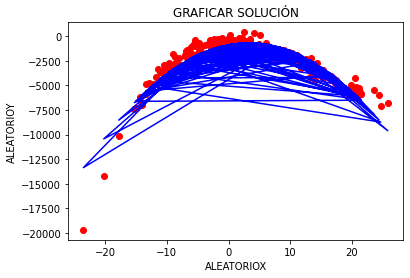

In [194]:
#Gráfica de la solución
fig = plt.figure()
plt.plot(x,y,'ro')
plt.plot(x,y_hat,'b')
plt.xlabel('ALEATORIOX')
plt.ylabel('ALEATORIOY')
plt.title('GRAFICAR SOLUCIÓN')

fig.savefig("grafica_sol.pdf", bbox_inches='tight')

##2.4.-Realizar Predicción grado 2

In [195]:
# Predicción
Xnew = 11

X_tst = [1, Xnew,Xnew**2]

y_tst = np.dot(X_tst,w)

y_tst

array([-1722.11717061])

##2.5.-Cálcular error de prueba (test) grado 2

In [197]:
# Error de prueba

y_real = 9.8

E_tst = (y_real-y_tst)**2
print(E_tst)

[2999537.0858548]


## 2.6.- Graficar la predicción sobre los datos de entrenamiento grado 2.

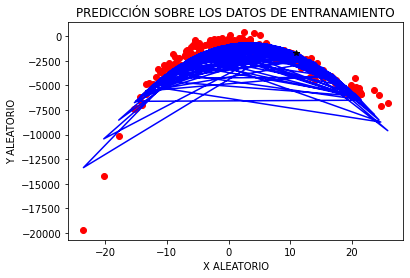

In [198]:
#Gráfica de la predicción

fig = plt.figure()
plt.plot(x,y,'ro')
plt.plot(x,y_hat,'b')
plt.plot(Xnew,y_tst,'*k')
plt.xlabel('X ALEATORIO')
plt.ylabel('Y ALEATORIO')
plt.title('PREDICCIÓN SOBRE LOS DATOS DE ENTRANAMIENTO')
fig.savefig("grafica_sol.pdf", bbox_inches='tight')



##2.7.-Ordenamiento grado 2

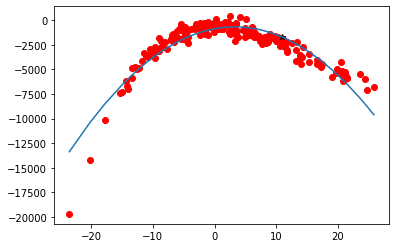

In [199]:
ind = np.argsort(x, axis=0)
x_sort =np.take_along_axis(x, ind, axis=0)
y_sort= np.take_along_axis(y_hat, ind, axis=0)
# Gráfica del resultado
plt.plot(x,y,'ro')
#plt.plot(x,y_hat,'b')
plt.plot(Xnew,y_tst,'*k')
plt.plot(x_sort,y_sort)

#plt.plot(xtr,ytr,'ro')
#plt.plot(X_tst,,'ro')
#plt.plot(x_sort,y_sort)

##2.-  REGRESIÓN POLINOMICA

In [200]:
#Cargamos bibliotecas
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.base import BaseEstimator
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##2.1.- Gereramos los datos

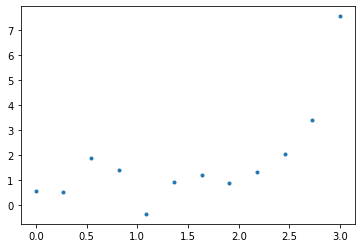

In [201]:
N = 12
sigma = 0.5
x = np.linspace(0,3,N)
eps = stats.norm.rvs(0,np.sqrt(sigma),size=N)
y = pol(x)+eps

plt.plot(x,y,'.')

In [202]:
class PolynomialRegression(BaseEstimator):
    #__init__-- Grado del polinomio defino el grado
    def __init__(self, deg=None):
        self.deg = deg
    #regresor
    def fit(self, X, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X, N=self.deg + 1), y)
    #predicción sobre el modelo
    def predict(self, x):
        return self.model.predict(np.vander(x, N=self.deg + 1))
    #bora coeficientes
    @property
    def coef_(self):
        return self.model.coef_

In [203]:
#regresor de modelo grado 3
modelo = PolynomialRegression(deg=3)
#modelo
modelo.fit(x,y)
#coeficientes
modelo.coef_

array([ 1.25196006, -4.24610926,  3.68130288,  0.36772281])

##2.2.- Modelo sobreajustado

Text(0, 0.5, 'y')

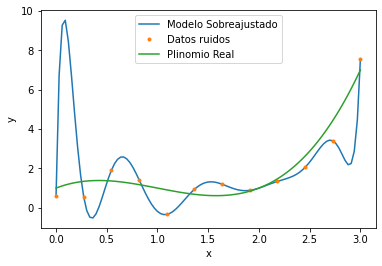

In [204]:
#modelo = numero muestras menos uno (grado 11)
modelo_sobre_ajustado = PolynomialRegression(deg=N-1)
#
modelo_sobre_ajustado.fit(x,y)

x_tst = np.linspace(0,3,100)
#predic
y_tst =modelo_sobre_ajustado.predict(x_tst)

plt.plot(x_tst,y_tst,label='Modelo Sobreajustado')
plt.plot(x,y,'.', label='Datos ruidos')
plt.plot(xr,yr,label='Plinomio Real')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

##2.3.- Modelo subajustado

Text(0, 0.5, 'y')

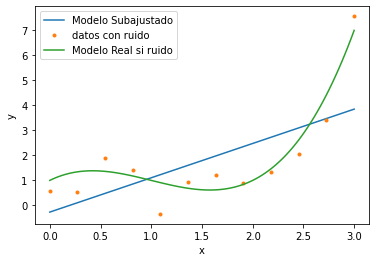

In [205]:
#Modelo Subajustado --> Muy sencillo
#Modelo grado 1
modelo_sub_ajustado = PolynomialRegression(deg=1)
modelo_sub_ajustado.fit(x,y)

x_tst = np.linspace(0,3,100)
#modelo subajustado 
y_tst =modelo_sub_ajustado.predict(x_tst)

plt.plot(x_tst,y_tst,label='Modelo Subajustado')
plt.plot(x,y,'.', label='datos con ruido')
plt.plot(xr,yr,label='Modelo Real si ruido')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

#4.- PROBLEMA 3
Con los datos generados en la primera pregunta (P1), se pide entrenar un modelo que generalice el problema utilizando k-fold cross validation. Representar una curva donde se pueda notar la evolución del error de validación en función del número del grado del polinomio. 

**VALIDACIÓN CRUZADA**

In [206]:
# importamos del sklearn el model selection
from sklearn.model_selection import GridSearchCV
# Importamos la metrica que vamos a tener
from sklearn.metrics import mean_squared_error

estimador = PolynomialRegression()
#degrees --> aqui van a estar los grados del polinomio
degrees = np.arange(1,25)
cv_model = GridSearchCV(estimador, 
                        param_grid={'deg':degrees},
                        scoring='neg_mean_squared_error' )
#a quien vamos a entrenar
cv_model.fit(x,y)

GridSearchCV(cv=None, error_score=nan, estimator=PolynomialRegression(deg=None),
             iid='deprecated', n_jobs=None,
             param_grid={'deg': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [207]:
#Cual es el mejor modelo= grado 3
cv_model.best_params_

{'deg': 3}

In [208]:
#Cuales son los coeficientes de ese estimador que me dice que es mejor
cv_model.best_estimator_.coef_

array([ 1.25196006, -4.24610926,  3.68130288,  0.36772281])

Text(0, 0.5, 'y')

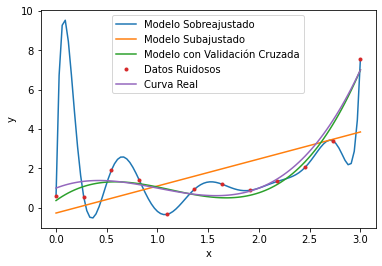

In [209]:
y_tst_over =modelo_sobre_ajustado.predict(x_tst)
y_tst_sub =modelo_sub_ajustado.predict(x_tst)
y_tst_cv = cv_model.predict(x_tst)
plt.plot(x_tst,y_tst_over,label='Modelo Sobreajustado')
plt.plot(x_tst,y_tst_sub,label='Modelo Subajustado')
plt.plot(x_tst,y_tst_cv,label='Modelo con Validación Cruzada')
plt.plot(x,y,'.', label='Datos Ruidosos')
plt.plot(xr,yr,label='Curva Real')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

#4.- PROBLEMA 4
Presente una breve discusión de los resultados obtenidos y exprese sus conclusiones a la vista de los resultados sobre el conjunto de datos analizado. 



**RESULTADO**
1.   En las imagenes.
2.   Se ahorra procesamiento en la compilación del código.
3.   Se revizo las bibliotecas pandas, numpy, seaborn,matplotlib, warnings, scipy.
**CONCLUSIONES**
1.   Se logró ordenar el polinomio de grado 2 para su visualización.
2.   Se logro comprender un modelo subajustado y sobreajustado. 
3.   Se logró interpretar comandos de validación cruzada.